# 문제 정의 : Titanic 생존/사망자 분석

* Dataset : titanic.csv
* Dataset 구성
    - PassengerId : 탑승객 일련번호
    - Survived : 생존유무( 0 = No, 1 = Yes )
    - Pclass : 객실 등급( 1 = 1st, 2 = 2nd, 3 = 3rd )
    - Name : 탑승객 이름
    - Sex : 탑승객 성별
    - Age : 탑승객 성별
    - SibSp : 탑승객 동반자 수( 형제/자매, 배우자 )
    - Parch : 탑승객 동반자 수( 자녀, 부모 )
    - Ticket : 티켓 번호
    - Fare : 티켓 요금
    - Cabin : 객실 번호
    - Embarked : 탑승 도시( C = Cherbourg, Q = Queenstown, S = Southampton )

In [1]:
# IPython 매직 명령
%matplotlib inline

# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
# font_path = "c:\\Windows\\Fonts\\malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path ).get_name()
# rc( 'font', family = font_name )

# Mac OS 사용시 matplotlib 한글 폰트 사용 설정
rc( 'font', family = 'AppleGothic' )

import warnings
warnings.filterwarnings( 'ignore' )

## 1. 데이터 수집

* DataFrame 생성
* DataFrame 기본 정보 확인

In [14]:
titanic = pd.read_csv( '../data/titanic.csv', index_col = 0 )

In [15]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen...",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. Jo...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss....",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. J...",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. Willi...",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. J...",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Ma...",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. ...",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl H...",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
titanic.shape

(891, 11)

In [11]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

## 2. 데이터 전처리

### 결측치 처리

In [17]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = [ 'column', 'count' ]
missing_df

,column,count
0,Survived,0
1,Pclass,0
2,Name,0
3,Sex,0
4,Age,177
5,SibSp,0
6,Parch,0
7,Ticket,0
8,Fare,0
9,Cabin,687


In [23]:
# 결측치가 있는 변수의 전체 데이터에 대한 결측치 비율
missing_df[ 'ratio' ] = missing_df[ 'count' ] / titanic.shape[ 0 ]
missing_df.loc[ missing_df[ 'ratio' ] != 0 ]

,column,count,ratio
4,Age,177,0.198653
9,Cabin,687,0.771044
10,Embarked,2,0.002245


#### Cabin 변수는 삭제

In [24]:
titanic.dropna( axis = 1, thresh = 500, inplace = True )

In [25]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [26]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

#### Age 변수는 다른값으로 대체

In [27]:
titanic[ 'Age' ].mean() # 전체 탑승인원에 대한 평균 나이

29.69911764705882

In [30]:
titanic[ titanic[ 'Pclass' ] == 1 ][ 'Age' ].mean() # 1등석 객실 탑승 인원 평균 나이

38.233440860215055

In [31]:
titanic[ titanic[ 'Pclass' ] == 2 ][ 'Age' ].mean() # 2등석 객실 탑승 인원 평균 나이

29.87763005780347

In [32]:
titanic[ titanic[ 'Pclass' ] == 3 ][ 'Age' ].mean() # 3등석 객실 탑승 인원 평균 나이

25.14061971830986

In [34]:
def replace_average_age( cols ):
    age = cols[ 0 ] # Age
    pclass = cols[ 1 ] # Pclass
    
    if pd.isnull( age ):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 25
    else:
        return age

In [35]:
titanic[ 'Age' ] = titanic[ [ 'Age', 'Pclass' ] ].apply( replace_average_age, axis = 1 )

In [36]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

#### Embarked 변수는 최빈값을 대체

In [39]:
embarked_s = titanic[ 'Embarked' ].describe()
embarked_s

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [41]:
titanic[ 'Embarked' ] = titanic[ 'Embarked' ].fillna( embarked_s[ 'top' ] )

In [42]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### 이상치 확인

<AxesSubplot:>

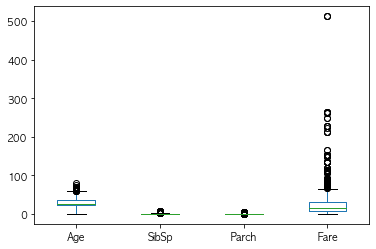

In [47]:
titanic[ [ 'Age', 'SibSp', 'Parch', 'Fare' ] ].plot( kind = 'box' )

### 변수 유형 변경( 범주형으로 변환 )

In [48]:
titanic[ 'Survived' ] = titanic[ 'Survived' ].astype( 'category' )
titanic[ 'Pclass' ] = titanic[ 'Pclass' ].astype( 'category' )
titanic[ 'Embarked' ] = titanic[ 'Embarked' ].astype( 'category' )

In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 58.7+ KB


In [50]:
titanic.to_csv( '../data/titanic_clean.csv' )

## 3. EDA

### 기초 통계

In [51]:
titanic.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.252716,0.523008,0.381594,32.204208
std,13.211959,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,26.000000,0.000000,0.000000,14.454200
75%,37.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


### 범주형 변수에 대한 정보

In [56]:
survived_list = list( titanic[ 'Survived' ].unique() )

print( '생존 유무' )
for v in survived_list:
    print( f'{v}\t' )
print( f'\n생존 유무 : {len( survived_list ) }' )

생존 유무
0	
1	

생존 유무 : 2


In [63]:
survived_s = titanic[ 'Survived' ].value_counts()
count = titanic[ 'Survived' ].count()
survived = list( survived_s.index )
survived_count = list( survived_s.values )

for i in range( len( survived_count ) ):
    print( f'생존유무 : [ {survived[ i ]} ] - {survived_count[ i ]}명', end = '' )
    print( f'( {survived_count[ i ] / count * 100:5.2f}% )' )

생존유무 : [ 0 ] - 549명( 61.62% )
생존유무 : [ 1 ] - 342명( 38.38% )


In [57]:
pclass_list = sorted( list( titanic[ 'Pclass' ].unique() ) )

print( '객실 종류( 등급 )' )
for v in pclass_list:
    print( f'{v}\t' )
print( f'\n객실 등급 : {len( pclass_list ) }개 등급' )

객실 종류( 등급 )
1	
2	
3	

객실 등급 : 3개 등급


In [67]:
pclass_s = titanic[ 'Pclass' ].value_counts()
count = titanic[ 'Pclass' ].count()
pclass = list( pclass_s.index )
pclass_count = list( pclass_s.values )

for i in range( len( pclass_count ) ):
    print( f'객실 등급 : [ {pclass[ i ]} ] - {pclass_count[ i ]}명', end = '' )
    print( f'( {pclass_count[ i ] / count * 100:5.2f}% )' )

객실 등급 : [ 3 ] - 491명( 55.11% )
객실 등급 : [ 1 ] - 216명( 24.24% )
객실 등급 : [ 2 ] - 184명( 20.65% )


In [64]:
sex_list = sorted( list( titanic[ 'Sex' ].unique() ) )

print( '성별' )
for v in sex_list:
    print( f'{v}\t' )
print( f'\n성별 : {len( sex_list ) }' )

성별
female	
male	

성별 : 2


In [71]:
sex_s = titanic[ 'Sex' ].value_counts()
count = titanic[ 'Sex' ].count()
sex = list( sex_s.index )
sex_count = list( sex_s.values )

for i in range( len( sex_count ) ):
    print( f'성별 : [ {sex[ i ]} ] - {sex_count[ i ]}명', end = '' )
    print( f'( {sex_count[ i ] / count * 100:5.2f}% )' )

성별 : [ male ] - 577명( 64.76% )
성별 : [ female ] - 314명( 35.24% )


In [59]:
embarked_list = sorted( list( titanic[ 'Embarked' ].unique() ) )

print( '탑승 도시' )
for v in embarked_list:
    print( f'{v}\t' )
print( f'\n탑승 도시 : {len( embarked_list ) }개 도시' )

탑승 도시
C	
Q	
S	

탑승 도시 : 3개 도시


In [70]:
embarked_s = titanic[ 'Embarked' ].value_counts()
count = titanic[ 'Embarked' ].count()
embarked = list( embarked_s.index )
embarked_count = list( embarked_s.values )

for i in range( len( embarked_count ) ):
    print( f'탑승 도시 : [ {embarked[ i ]} ] - {embarked_count[ i ]}명', end = '' )
    print( f'( {embarked_count[ i ] / count * 100:5.2f}% )' )

탑승 도시 : [ S ] - 646명( 72.50% )
탑승 도시 : [ C ] - 168명( 18.86% )
탑승 도시 : [ Q ] - 77명(  8.64% )


### 연속형 변수에 대한 이해

In [76]:
print( f'전 체 평균 나이 : {round( titanic[ "Age" ].mean(), 2 ):6.2f}\n' )
print( f'1등석 평균 나이 : {round( titanic[ titanic[ "Pclass" ] == 1 ][ "Age" ].mean(), 2 ):6.2f}' )
print( f'2등석 평균 나이 : {round( titanic[ titanic[ "Pclass" ] == 2 ][ "Age" ].mean(), 2 ):6.2f}' )
print( f'3등석 평균 나이 : {round( titanic[ titanic[ "Pclass" ] == 3 ][ "Age" ].mean(), 2 ):6.2f}' )

전 체 평균 나이 :  29.25

1등석 평균 나이 :  38.20
2등석 평균 나이 :  29.83
3등석 평균 나이 :  25.10


### 객실과 성별, 나이간의 관계

In [78]:
grouped = titanic.groupby( [ 'Pclass' ] )
average = grouped.mean()
average

,Age,SibSp,Parch,Fare
Pclass,,,,
1,38.201019,0.416667,0.356481,84.154687
2,29.825163,0.402174,0.380435,20.662183
3,25.101670,0.615071,0.393075,13.675550


In [79]:
grouped = titanic.groupby( [ 'Pclass', 'Sex' ] )
average = grouped.mean()
average

Age     SibSp     Parch        Fare
Pclass Sex                                              
1      female  34.936170  0.553191  0.457447  106.125798
       male    40.716557  0.311475  0.278689   67.226127
2      female  28.730263  0.486842  0.605263   21.970121
       male    30.595648  0.342593  0.222222   19.741782
3      female  22.697917  0.895833  0.798611   16.118810
       male    26.099193  0.498559  0.224784   12.661633

### 시각화

#### 객실별 데이터 분산

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

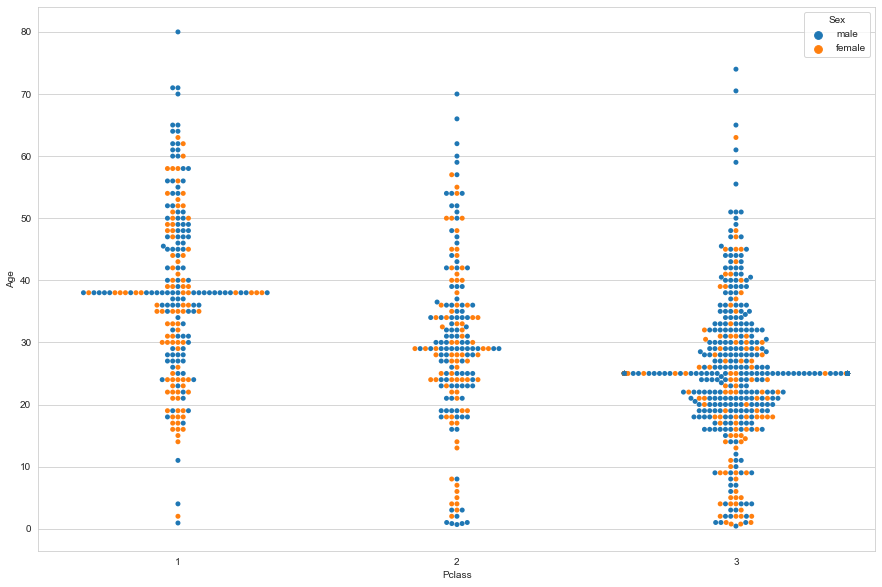

In [84]:
sns.set_style( 'whitegrid' )
plt.figure( figsize = ( 15, 10 ) )
sns.swarmplot( x = 'Pclass', y = 'Age',
               data = titanic, hue = 'Sex' )

#### 객실별 성별 인원수

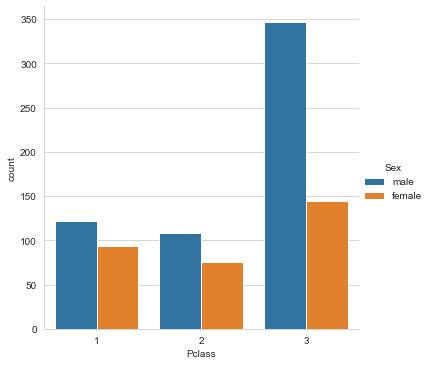

In [86]:
sns.catplot( x = 'Pclass', data = titanic, kind = 'count', hue = 'Sex' )

* 3등석은 남성 승객이 여성 승객보다 월등이 많다.

#### 성별 인원수

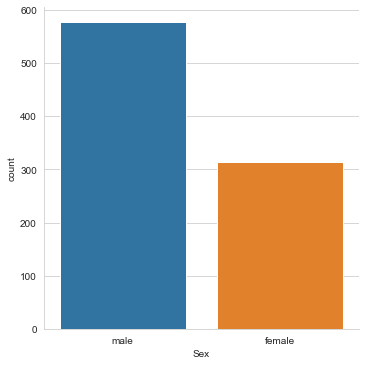

In [87]:
sns.catplot( x = 'Sex', data = titanic, kind = 'count' )

* 남성 탑승객의 인원이 여성 탑승객보다 2배정도 많다.

#### 객실별 생존 비율

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

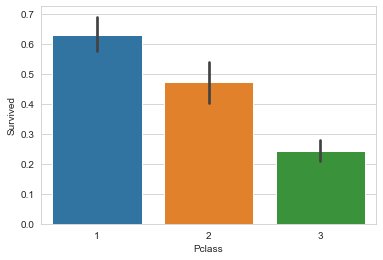

In [89]:
titanic[ 'Survived' ] = titanic[ 'Survived' ].astype( 'int64' )
titanic[ 'Pclass' ] = titanic[ 'Pclass' ].astype( 'int64' )

sns.barplot( x = 'Pclass', y = 'Survived', data = titanic )

* 1등석 탑승객의 생존율이 높다.

#### 성별 생존 비율

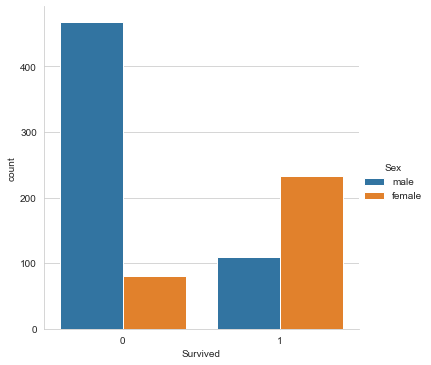

In [91]:
sns.catplot( x = 'Survived', data = titanic, kind = 'count', hue = 'Sex' )

* 여성 탑승객의 생존율이 높다.

#### 연령별 생존/사망 인원수

<AxesSubplot:xlabel='count', ylabel='Age'>

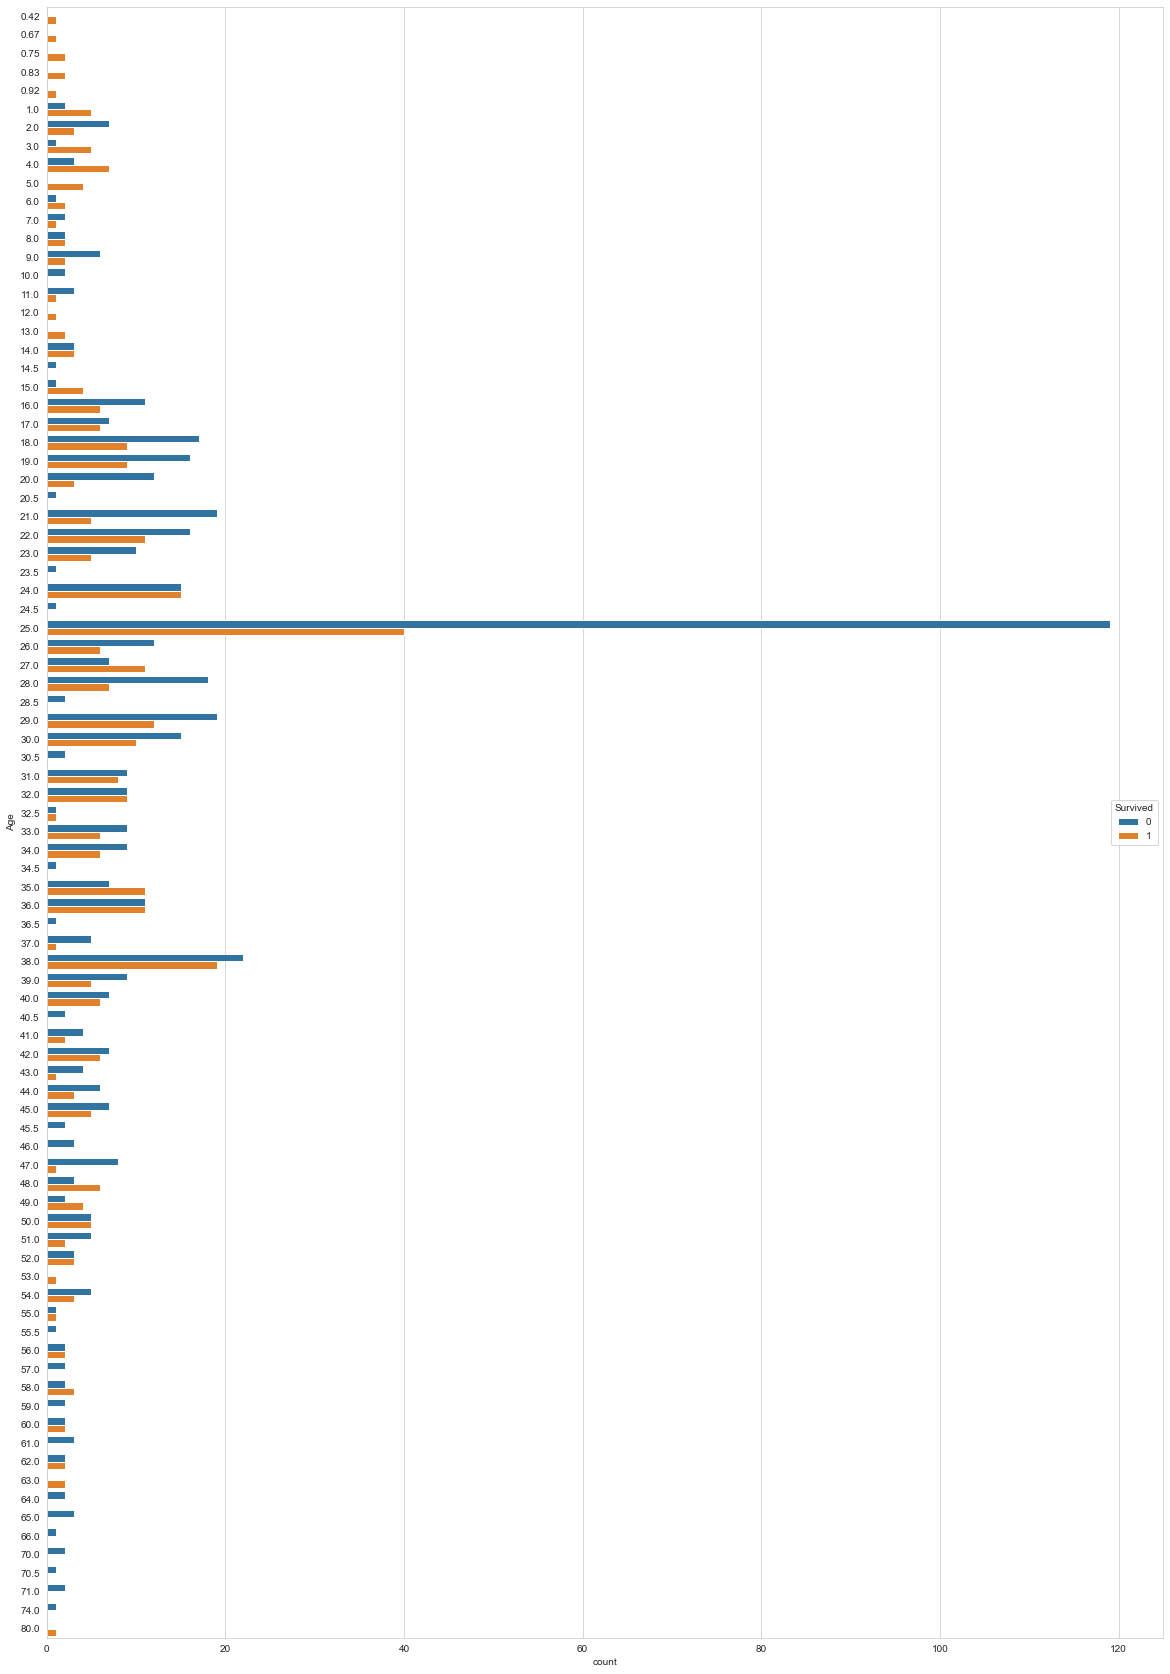

In [92]:
plt.figure( figsize = ( 20, 30 ) )
sns.countplot( y = 'Age', hue = 'Survived', data = titanic )

# 문제 정의 : 자동차 연비 분석

* Dataset : titanic.csv
* Dataset 구성
    - mpg : 연비( continuous )
    - cylinders : 실린더수( multi-valued discrete )
    - displacement : 배기량( continuous )
    - horsepower : 마력( continuous )
    - weight : 무게( 중량 )( continuous )
    - acceleration : 가속력( continuous )
    - model year : 모델 출시년도( multi-valued discrete )
    - origin : 출시국가( multi-valued discrete )
    - car name : 모델명( string (unique for each instance) )

## 1. 데이터 수집

* DataFrame 생성
* DataFrmae 기본 정보 확인

In [102]:
df = pd.read_csv( '../data/auto-mpg.csv', sep = '\s+', header = None )

df.columns = [ 'mpg', 'cylinders', 'displacement', 'horsepower',
               'weight', 'acceleration', 'year', 'origin',
               'name' ]

In [103]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [104]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [106]:
df.shape

(398, 9)

In [107]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

## 2. 데이터 전처리

### 결측치 처리

In [108]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### 중복값 확인

In [109]:
df.duplicated().sum()

0

### 이상치 확인

<AxesSubplot:>

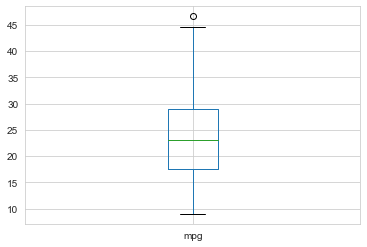

In [112]:
df[ [ 'mpg' ] ].plot( kind = 'box' )

<AxesSubplot:>

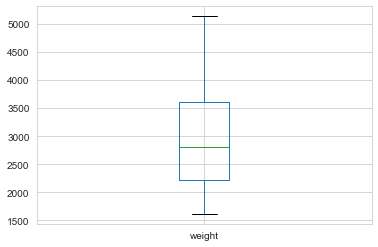

In [113]:
df[ [ 'weight' ] ].plot( kind = 'box' )

<AxesSubplot:>

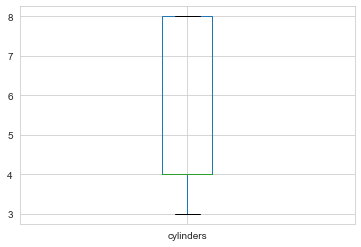

In [120]:
df[  'cylinders'  ].plot( kind = 'box' )

<AxesSubplot:>

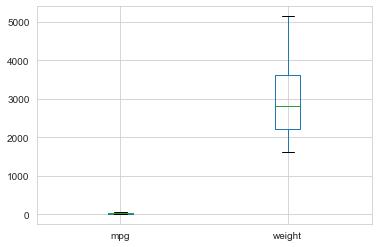

In [121]:
df[ [ 'mpg', 'weight' ] ].plot( kind = 'box' )

### horsepower 변수 자료형 변환

In [115]:
df[ 'horsepower' ].dtypes

dtype('O')

In [116]:
df[ 'horsepower' ].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [118]:
df[ 'horsepower' ].replace( '?', np.nan, inplace = True ) # ?를 NaN 대체
df.dropna( subset = [ 'horsepower' ], axis = 0, inplace = True ) # 결측치 삭제
df[ 'horsepower' ] = df[ 'horsepower' ].astype( 'float' ) # 타입 변환

In [119]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

### 범주형 변수 설정

In [126]:
for v in df.columns:
    print( f'{v}' )
    print( df[ v ].value_counts() )
    print()

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
26.5     1
19.1     1
33.8     1
28.1     1
31.8     1
Name: mpg, Length: 127, dtype: int64

cylinders
4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

displacement
97.0     21
350.0    18
98.0     17
318.0    17
250.0    17
         ..
83.0      1
181.0     1
81.0      1
96.0      1
104.0     1
Name: displacement, Length: 81, dtype: int64

horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
77.0      1
193.0     1
138.0     1
54.0      1
Name: horsepower, Length: 93, dtype: int64

weight
2130.0    4
1985.0    4
2265.0    3
2720.0    3
2125.0    3
         ..
2605.0    1
1945.0    1
2234.0    1
3570.0    1
4499.0    1
Name: weight, Length: 346, dtype: int64

acceleration
14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
18.3     1
11.1     1
19.9     1
20.7     1
11.3     1
Name: acceleration, Length: 95, dtype: int64

year
73    40

In [124]:
df[ 'cylinders' ] = df[ 'cylinders' ].astype( 'category' )
df[ 'year' ] = df[ 'year' ].astype( 'category' )
df[ 'origin' ] = df[ 'origin' ].astype( 'category' )

In [125]:
df.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower       float64
weight           float64
acceleration     float64
year            category
origin          category
name              object
dtype: object

## 3. EDA

### 기초 통계

In [127]:
df.describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


### 연비 

In [129]:
print( f'평균 연비 : {df[ "mpg" ].mean():6.2f} mpg' )
print( f'최고 연비 : {df[ "mpg" ].max():6.2f} mpg' )
print( f'최저 연비 : {df[ "mpg" ].min():6.2f} mpg' )

평균 연비 :  23.45 mpg
최고 연비 :  46.60 mpg
최저 연비 :   9.00 mpg


In [133]:
print( '최고 연비 차량 정보'.center( 80 ) )
df[ df.mpg >= df.mpg.max() ]

                                  최고 연비 차량 정보                                   


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
322,46.6,4,86.0,65.0,2110.0,17.9,80,3,mazda glc


In [134]:
print( '최저 연비 차량 정보'.center( 80 ) )
df[ df.mpg <= df.mpg.min() ]

                                  최저 연비 차량 정보                                   


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d


<AxesSubplot:xlabel='mpg', ylabel='Density'>

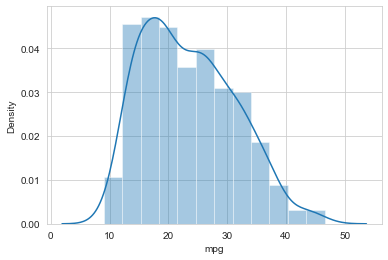

In [135]:
sns.set_style( 'whitegrid' )
sns.distplot( df[ 'mpg' ] )

### 배기량

In [136]:
print( f'평균 배기량 : {df[ "displacement" ].mean():6.2f}' )
print( f'최고 배기량 : {df[ "displacement" ].max():6.2f}' )
print( f'최저 배기량 : {df[ "displacement" ].min():6.2f}' )

평균 배기량 : 194.41
최고 배기량 : 455.00
최저 배기량 :  68.00


In [137]:
print( '최고 배기량 차량 정보'.center( 80 ) )
df[ df.displacement >= df.displacement.max() ]

                                  최고 배기량 차량 정보                                  


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225.0,3086.0,10.0,70,1,buick estate wag...
95,12.0,8,455.0,225.0,4951.0,11.0,73,1,buick electra 22...


In [138]:
print( '최저 배기량 차량 정보'.center( 80 ) )
df[ df.displacement <= df.displacement.min() ]

                                  최저 배기량 차량 정보                                  


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
117,29.0,4,68.0,49.0,1867.0,19.5,73,2,fiat 128


<AxesSubplot:xlabel='displacement', ylabel='Density'>

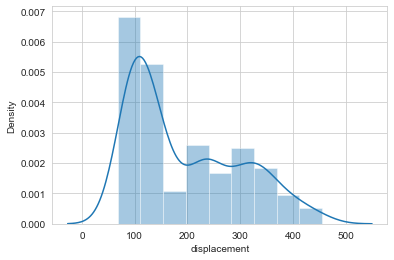

In [139]:
sns.set_style( 'whitegrid' )
sns.distplot( df[ 'displacement' ] )

### 마력

In [140]:
print( f'평균 마력 : {df[ "horsepower" ].mean():6.2f}' )
print( f'최고 마력 : {df[ "horsepower" ].max():6.2f}' )
print( f'최저 마력 : {df[ "horsepower" ].min():6.2f}' )

평균 마력 : 104.47
최고 마력 : 230.00
최저 마력 :  46.00


In [141]:
print( '최고 마력 차량 정보'.center( 80 ) )
df[ df.horsepower >= df.horsepower.max() ]

                                  최고 마력 차량 정보                                   


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
116,16.0,8,400.0,230.0,4278.0,9.5,73,1,pontiac grand prix


In [142]:
print( '최저 마력 차량 정보'.center( 80 ) )
df[ df.horsepower <= df.horsepower.min() ]

                                  최저 마력 차량 정보                                   


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
19,26.0,4,97.0,46.0,1835.0,20.5,70,2,volkswagen 1131 ...
102,26.0,4,97.0,46.0,1950.0,21.0,73,2,volkswagen super...


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

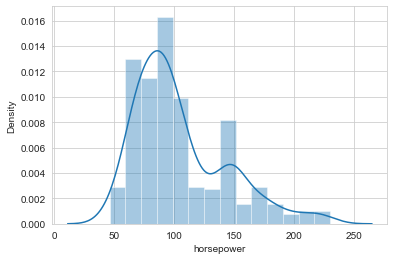

In [143]:
sns.set_style( 'whitegrid' )
sns.distplot( df[ 'horsepower' ] )

### 중량

In [144]:
print( f'평균 중량 : {df[ "weight" ].mean():6.2f}' )
print( f'최고 중량 : {df[ "weight" ].max():6.2f}' )
print( f'최저 중량 : {df[ "weight" ].min():6.2f}' )

평균 중량 : 2977.58
최고 중량 : 5140.00
최저 중량 : 1613.00


In [145]:
print( '최고 중량 차량 정보'.center( 80 ) )
df[ df.weight >= df.weight.max() ]

                                  최고 중량 차량 정보                                   


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
44,13.0,8,400.0,175.0,5140.0,12.0,71,1,pontiac safari (sw)


In [152]:
print( '최저 중량 차량 정보'.center( 80 ) )
df[ df.weight <= df.weight.min() ]

                                  최저 중량 차량 정보                                   


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
54,35.0,4,72.0,69.0,1613.0,18.0,71,3,datsun 1200


<AxesSubplot:xlabel='weight', ylabel='Density'>

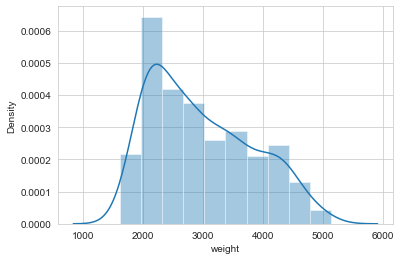

In [148]:
sns.set_style( 'whitegrid' )
sns.distplot( df[ 'weight' ] )

### 가속력

In [149]:
print( f'평균 가속력 : {df[ "acceleration" ].mean():6.2f}' )
print( f'최고 가속력 : {df[ "acceleration" ].max():6.2f}' )
print( f'최저 가속력 : {df[ "acceleration" ].min():6.2f}' )

평균 가속력 :  15.54
최고 가속력 :  24.80
최저 가속력 :   8.00


In [150]:
print( '최고 가속력 차량 정보'.center( 80 ) )
df[ df.acceleration >= df.acceleration.max() ]

                                  최고 가속력 차량 정보                                  


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
299,27.2,4,141.0,71.0,3190.0,24.8,79,2,peugeot 504


In [151]:
print( '최저 가속력 차량 정보'.center( 80 ) )
df[ df.acceleration <= df.acceleration.min() ]

                                  최저 가속력 차량 정보                                  


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
11,14.0,8,340.0,160.0,3609.0,8.0,70,1,plymouth 'cuda 340


<AxesSubplot:xlabel='acceleration', ylabel='Density'>

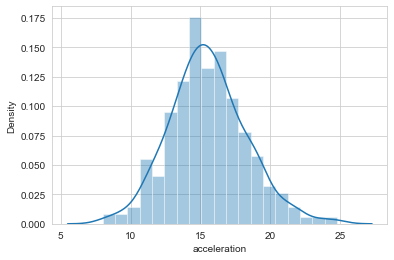

In [153]:
sns.set_style( 'whitegrid' )
sns.distplot( df[ 'acceleration' ] )

### 실린더수

In [154]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

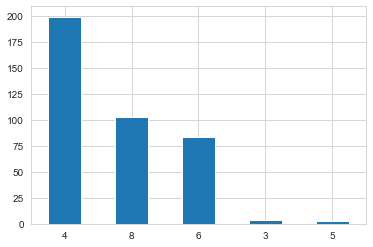

In [160]:
ax = df.cylinders.value_counts().plot( kind = 'bar' )
ax.set_xticklabels(  df.cylinders.value_counts().index, rotation = 0 )
plt.show()

### 출시년도

In [162]:
df.year.value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: year, dtype: int64

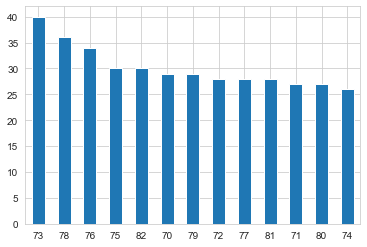

In [163]:
ax = df.year.value_counts().plot( kind = 'bar' )
ax.set_xticklabels(  df.year.value_counts().index, rotation = 0 )
plt.show()

### 출시국가

In [164]:
df.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

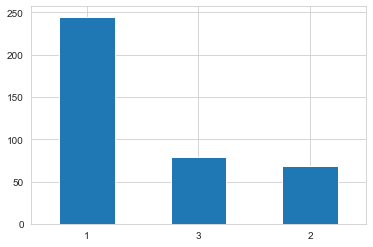

In [165]:
ax = df.origin.value_counts().plot( kind = 'bar' )
ax.set_xticklabels(  df.origin.value_counts().index, rotation = 0 )
plt.show()

In [171]:
df[ 'count' ] = 1
df_origin = df.groupby( 'origin' ).sum()
df_origin.index = [ 'USA', 'EU', 'JPN' ]
df_origin

,mpg,displacement,horsepower,weight,acceleration,count
USA,4908.2,60640.5,29167.0,826260.0,3672.6,245
EU,1877.0,7455.0,5478.0,165476.0,1142.0,68
JPN,2405.6,8114.0,6307.0,175477.0,1277.6,79


<AxesSubplot:ylabel='count'>

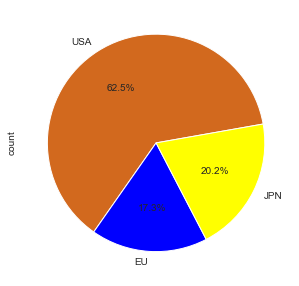

In [172]:
df_origin[ 'count' ].plot( kind = 'pie', figsize = ( 7, 5 ),
                           autopct = '%1.1f%%', startangle = 10,
                           colors = [ 'chocolate', 'blue', 'yellow' ] )

### 출시 국가별 통계

In [174]:
grouped = df.groupby( [ 'origin' ] )
average = grouped.mean()
average[ [ 'mpg', 'displacement', 'horsepower', 'weight', 'acceleration' ] ]

,mpg,displacement,horsepower,weight,acceleration
origin,,,,,
1,20.033469,247.512245,119.048980,3372.489796,14.990204
2,27.602941,109.632353,80.558824,2433.470588,16.794118
3,30.450633,102.708861,79.835443,2221.227848,16.172152


<AxesSubplot:xlabel='origin'>

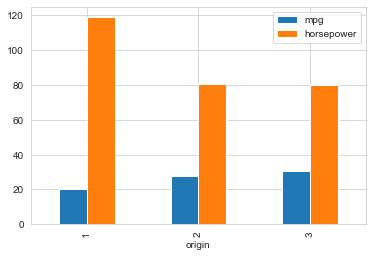

In [177]:
average[ [ 'mpg', 'horsepower' ] ].plot( kind = 'bar')

### 변수간 상관관계

In [178]:
df[ [ 'mpg', 'displacement', 'horsepower', 'weight', 'acceleration' ] ].corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000


<AxesSubplot:>

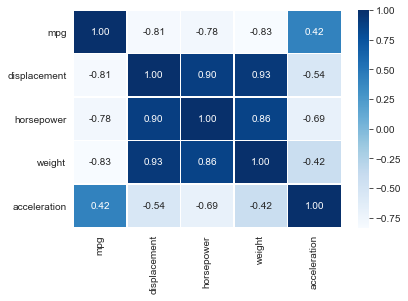

In [180]:
sns.heatmap( data = df[ [ 'mpg', 'displacement', 'horsepower', 
                          'weight', 'acceleration' ] ].corr(), annot = True,
             fmt = '.2f', linewidths = .5, cmap = 'Blues' )

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

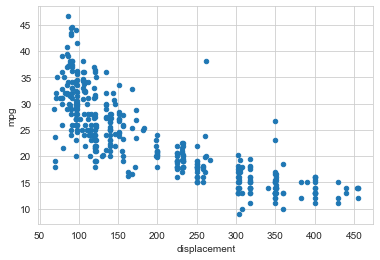

In [181]:
df.plot( x = 'displacement', y = 'mpg', kind = 'scatter' )

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

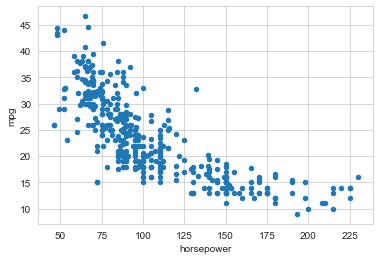

In [182]:
df.plot( x = 'horsepower', y = 'mpg', kind = 'scatter' )

<AxesSubplot:xlabel='weight', ylabel='mpg'>

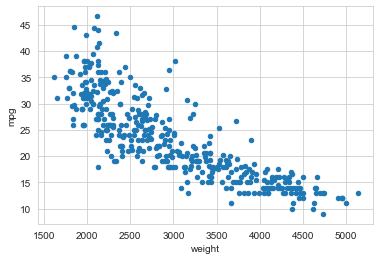

In [183]:
df.plot( x = 'weight', y = 'mpg', kind = 'scatter' )

<AxesSubplot:xlabel='mpg', ylabel='weight'>

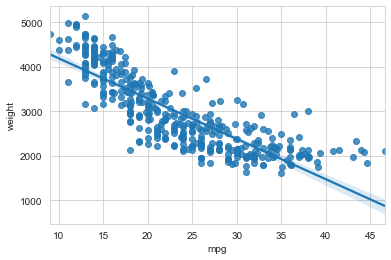

In [184]:
sns.regplot( x = 'mpg', y = 'weight', data = df )

<AxesSubplot:xlabel='weight', ylabel='mpg'>

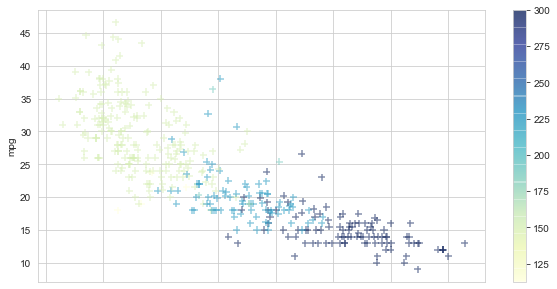

In [197]:
df2 = df.copy()
df2[ 'cylinders' ] = df2[ 'cylinders' ].astype( 'int' )
cylinder_size = df2.cylinders / df2.cylinders.max() * 300
df2.plot( kind = 'scatter', x = 'weight', y = 'mpg', marker = '+',
         figsize = ( 10, 5 ), cmap = 'YlGnBu', c = cylinder_size, 
         s = 50, alpha = 0.5 )

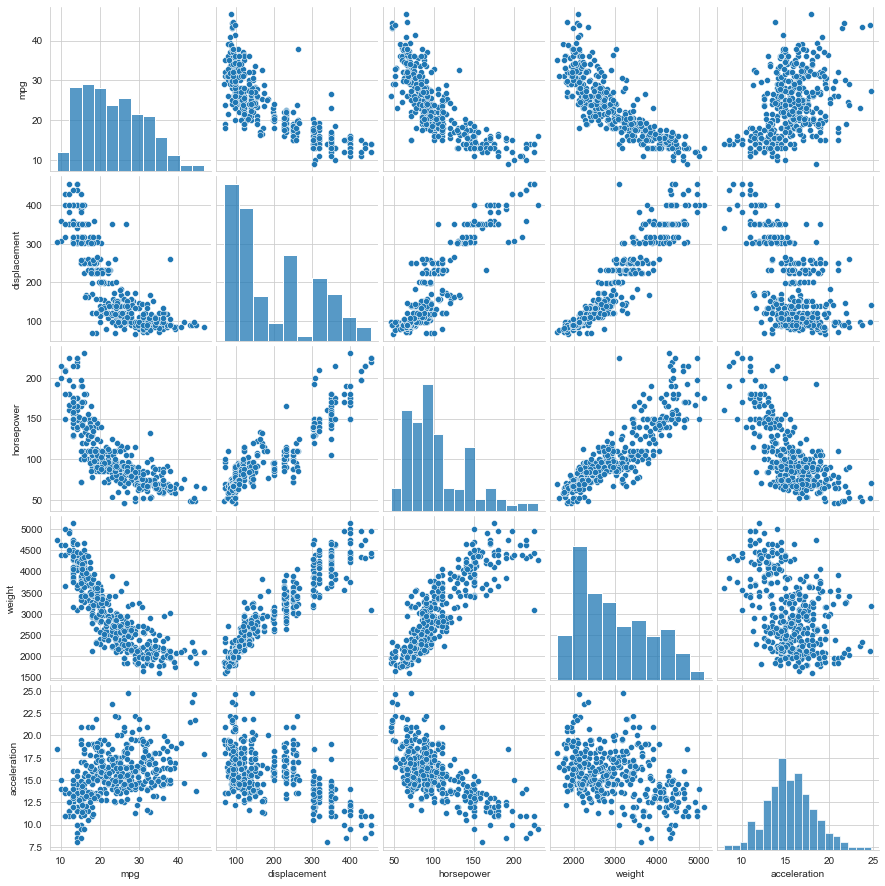

In [189]:
sns.pairplot( df[ [ 'mpg', 'displacement', 
                    'horsepower', 'weight', 'acceleration' ] ] )

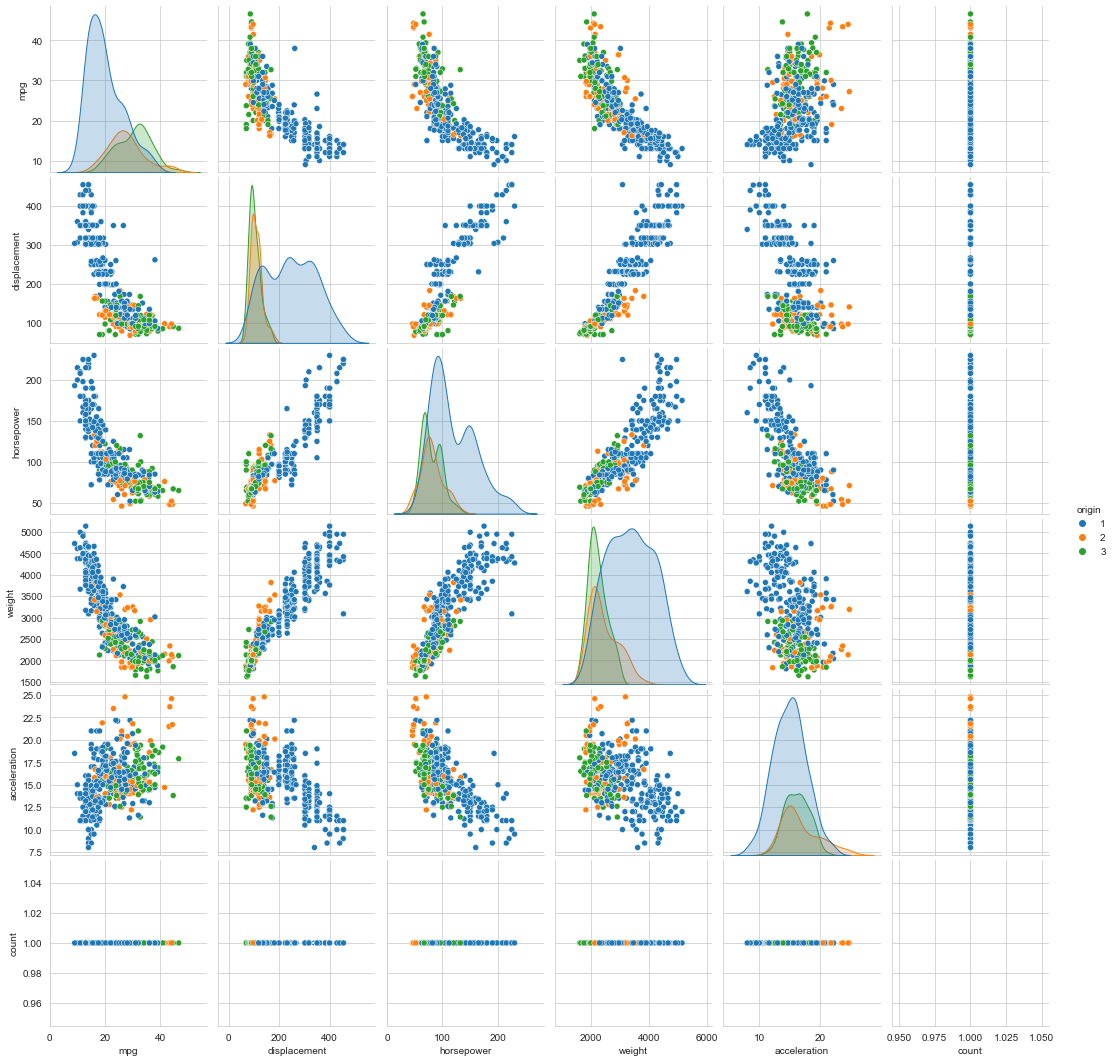

In [191]:
sns.pairplot( df, hue = 'origin' )